# Analysis 2

In [1]:
#In this analysis I look at the market in terms of bedrooms and bathroom provided. 
#I will draw a heatmap showing the number of airbnbs of various Bathroom/Bedroom configurations. 
import pandas as pd
import numpy as np

listing=pd.read_csv("../finaldata/listings_all_clean.csv", encoding = "ISO-8859-1")

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:

#Not surprisingly housing availability is clustered around the 1 bed 1 bath, with dorms and such having less and large rentals having more. The vast majority of entities fall into a 0x0-to-2x2 box.

In [22]:
#to get the data set I first get the count of listings for the number of bathrooms and bedrooms and then pivot that table
bedbath=listing[listing['price']<600].groupby(['bathrooms', 'bedrooms']).count()['price'].reset_index().pivot('bathrooms', 'bedrooms', 'price').sort_index(ascending=False)
bedbath.to_csv('listing_bed_bath.csv')
bedbath.ix[5:,0:5]

bedrooms,0.0,1.0,2.0,3.0,4.0,5.0
bathrooms,,,,,,
5.0,NaN,17.0,1.0,2.0,2.0,6.0
4.5,NaN,6.0,NaN,2.0,12.0,14.0
4.0,2.0,59.0,2.0,14.0,39.0,19.0
3.5,1.0,60.0,3.0,59.0,79.0,12.0
3.0,1.0,393.0,68.0,291.0,210.0,40.0
2.5,1.0,360.0,268.0,427.0,133.0,23.0
2.0,33.0,3126.0,3100.0,1456.0,338.0,37.0
1.5,27.0,2903.0,757.0,306.0,49.0,6.0
1.0,6840.0,49018.0,6628.0,989.0,79.0,8.0


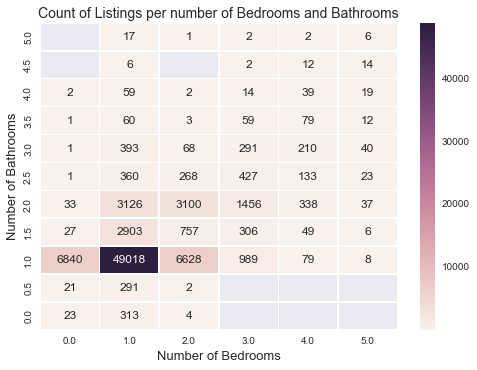

In [23]:
sns.heatmap(bedbath.ix[5:,0:5], fmt='.0f', annot=True, linewidths=0.5)
sns.plt.title('Count of Listings per number of Bedrooms and Bathrooms',fontsize=14)
plt.xlabel('Number of Bedrooms',fontsize=13)
plt.ylabel('Number of Bathrooms',fontsize=13)

plt.savefig('heatmap.png',bbox_inches='tight')
plt.show()